# Explore here

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from pickle import dump

In [4]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep=",")
total_data = total_data.drop_duplicates().reset_index(drop=True)

In [5]:
print(total_data.info())
print(total_data.isnull().sum())
print(total_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
None
fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64
               fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580

In [6]:
numeric_columns = total_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [7]:
total_data_clean = total_data[numeric_columns].dropna()

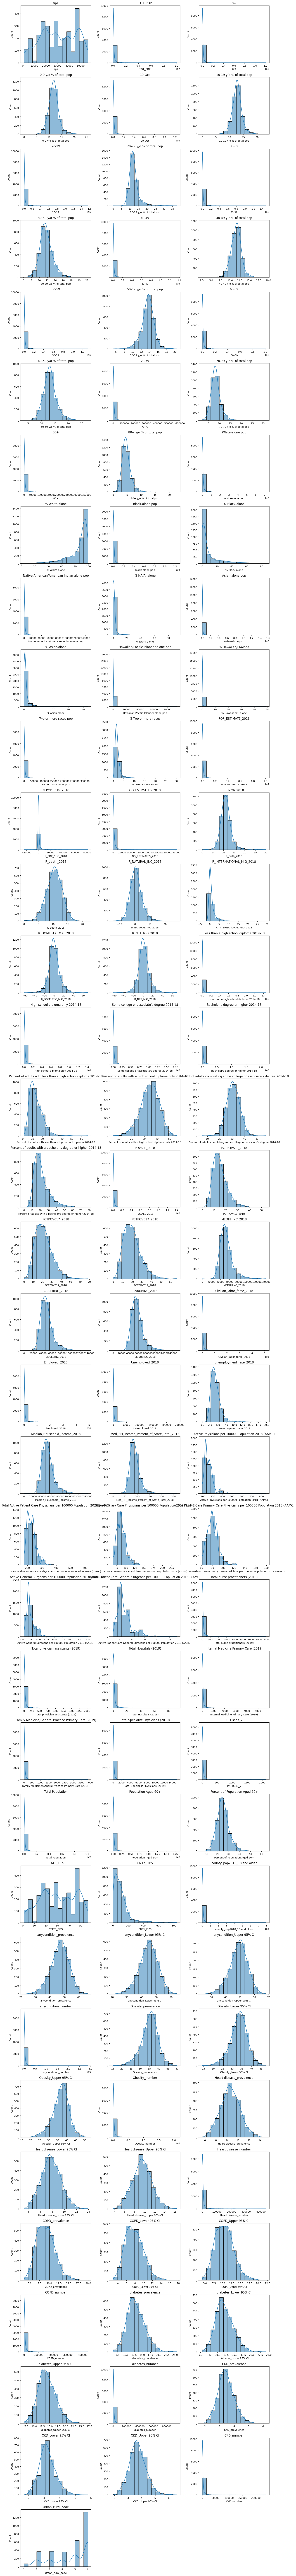

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the data (if not already loaded)
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep=",")
total_data = total_data.drop_duplicates().reset_index(drop=True)

# Select numeric columns
numeric_columns = total_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Drop rows with NaN values in numeric columns
total_data_clean = total_data[numeric_columns].dropna()

# Determine number of rows and columns for subplots
num_cols = 3  # Set the number of columns you want
num_rows = math.ceil(len(numeric_columns) / num_cols)

plt.figure(figsize=(num_cols * 5, num_rows * 4))  # Adjusting figure size based on rows and columns
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(total_data_clean[column], bins=15, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

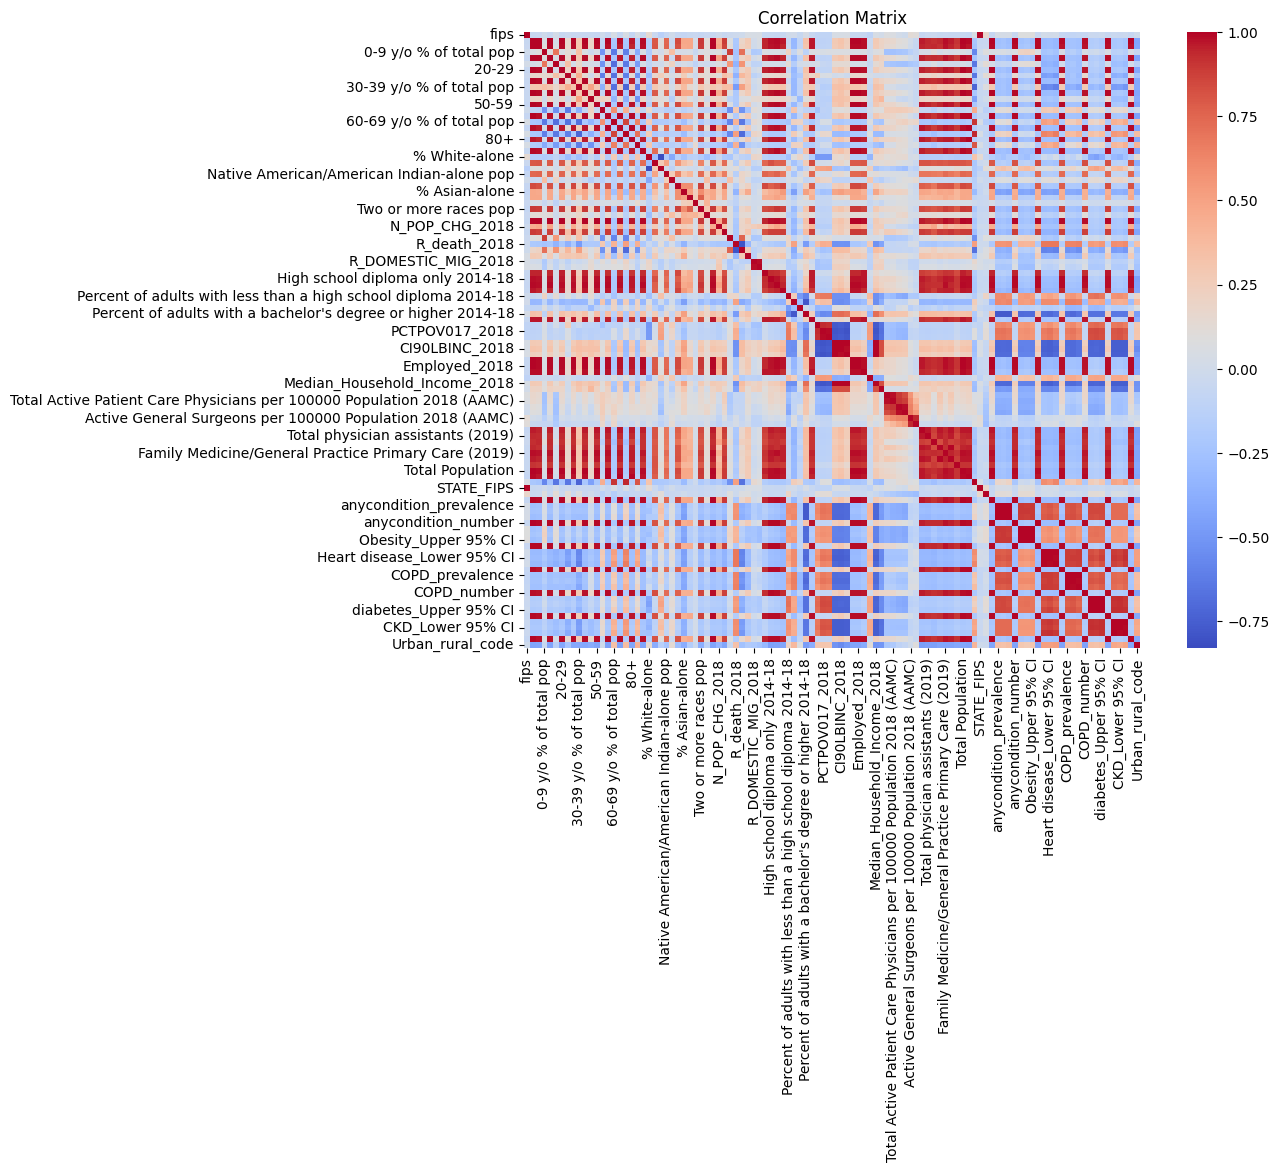

In [9]:
correlation_matrix = total_data[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix')
plt.show()

In [10]:
total_data = total_data.drop_duplicates().reset_index(drop=True)
scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[numeric_columns])

In [11]:
total_data_scal = pd.DataFrame(norm_features, index=total_data.index, columns=numeric_columns)
total_data_scal["Heart disease_number"] = total_data["Heart disease_number"]

In [12]:
X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func=f_regression, k=k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

In [14]:
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

In [15]:
X_train_sel["Heart disease_number"] = y_train.reset_index(drop=True)
X_test_sel["Heart disease_number"] = y_test.reset_index(drop=True)

In [16]:
X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)

In [17]:
model = LogisticRegression()
model.fit(X_train_sel.drop(columns=["Heart disease_number"]), X_train_sel["Heart disease_number"])

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept (a): [-0.32457405 -0.32492663 -0.32325856 ... -2.2807399  -2.24614698
 -2.168799  ]
Coefficients: [[-0.07176779 -0.06703078 -0.07345591 ... -0.11970905 -0.0834247
  -0.084092  ]
 [-0.07190901 -0.06768649 -0.07410094 ... -0.11970657 -0.08329058
  -0.08375063]
 [-0.07160945 -0.06703825 -0.07347594 ... -0.11944099 -0.0831571
  -0.08377888]
 ...
 [ 0.21802603  0.26808696  0.31094799 ...  0.27370168 -0.08365097
   0.31392701]
 [ 0.19327466  0.14275693  0.09985163 ...  0.2354511   0.11689451
   0.30035613]
 [ 0.22980715  0.10364704  0.12830949 ...  0.03695413  0.41410885
   0.28790562]]


In [19]:
y_pred = model.predict(X_test_sel.drop(columns=["Heart disease_number"]))
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 22614229.183121018
R2 Score: 0.7416268958253391


In [20]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_sel.drop(columns=["Heart disease_number"]), X_train_sel["Heart disease_number"])
score = lasso_model.score(X_test_sel.drop(columns=["Heart disease_number"]), y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [ 5103.56606854  1192.14607797 -1921.90787729  -804.66413704
  -565.56094295  4161.43524651   552.93901319 -1080.72356488
  3459.52199626  1245.55139019   999.98373671 -5424.05510818
   198.01474247  -841.91968637  -371.17714777  2792.66368052
   324.15462356    19.27250203 -1918.35380595    88.70731834
   492.63537754  -461.24851762  -854.99744188 -2893.16049233
  3359.53043536   204.58782867  1925.46994753  2907.60993035
  5383.37174712   819.64992462 -2329.43640877]
R2 score: 0.9978911816625889


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.505e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [21]:
dump(lasso_model, open("../models/lasso_alpha-1.0.sav", "wb"))